In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import openeo
import pandas as pd
import os, re
import numpy as np
import pandas as pd
import rasterio
import matplotlib.pyplot as plt

In [2]:
connection = openeo.connect("https://openeo.dataspace.copernicus.eu").authenticate_oidc()

Visit https://identity.dataspace.copernicus.eu/auth/realms/CDSE/device?user_code=BXTI-TKAS 📋 to authenticate.

✅ Authorized successfully

Authenticated using device code flow.


In [3]:
lago_atitlan = {
    "west": -91.326256,
    "east": -91.07151,
    "south": 14.5948,
    "north": 14.750979
}
lago_amatitlan = {
    "west": -90.638065,
    "east": -90.512924,
    "south": 14.412347,
    "north": 14.493799
}

In [2]:
fechas = ["2025-02-07", "2025-02-10", "2025-02-25", "2025-02-27", "2025-03-02", "2025-03-04", "2025-03-07", "2025-03-09", "2025-03-12", "2025-03-14", "2025-03-19", "2025-03-22", "2025-03-24", "2025-03-26", "2025-04-03", "2025-04-11", "2025-04-13", "2025-04-15", "2025-04-16", "2025-04-18", "2025-04-28", "2025-05-03", "2025-05-13", "2025-05-28", "2025-07-10", "2025-07-17", "2025-07-20", "2025-07-24", "2025-08-01"]

In [3]:
print(len(fechas))

29


In [5]:
for fecha in fechas:
    try:
        # Lago Atitlán
        atitlan_cube = connection.load_collection(
            "SENTINEL2_L2A",
            spatial_extent=lago_atitlan,
            temporal_extent=[fecha, fecha],  # o un rango más amplio
            bands=["B02","B03","B04", "B05", "B07", "B08", "B8A", "B11", "B12"]
        )

        result_graph = atitlan_cube.save_result(format="GTIFF")
        job = connection.create_job(result_graph)
        job.start_and_wait()
        job.download_results(f"imgs1/{fecha}.tiff")

        # Lago Amatitlán
        amatitlan_cube = connection.load_collection(
            "SENTINEL2_L2A",
            spatial_extent=lago_amatitlan,
            temporal_extent=[fecha, fecha],
            bands=["B02","B03","B04", "B05", "B07", "B08", "B8A", "B11", "B12"]
        )

        result_graph = amatitlan_cube.save_result(format="GTIFF")
        job = connection.create_job(result_graph)
        job.start_and_wait()
        job.download_results(f"imgs2/{fecha}.tiff")

    except Exception as e:
        print(f"No se pudo procesar la fecha {fecha}: {e}")
        continue

0:00:00 Job 'j-2508130457244cd6886282ba50d443c2': send 'start'
0:00:14 Job 'j-2508130457244cd6886282ba50d443c2': created (progress 0%)
0:00:19 Job 'j-2508130457244cd6886282ba50d443c2': created (progress 0%)
0:00:25 Job 'j-2508130457244cd6886282ba50d443c2': created (progress 0%)
0:00:34 Job 'j-2508130457244cd6886282ba50d443c2': created (progress 0%)
0:00:44 Job 'j-2508130457244cd6886282ba50d443c2': created (progress 0%)
0:00:56 Job 'j-2508130457244cd6886282ba50d443c2': running (progress N/A)
0:01:12 Job 'j-2508130457244cd6886282ba50d443c2': running (progress N/A)
0:01:31 Job 'j-2508130457244cd6886282ba50d443c2': running (progress N/A)
0:01:56 Job 'j-2508130457244cd6886282ba50d443c2': finished (progress 100%)


C:\Users\dfsf2\AppData\Local\Temp\ipykernel_22804\1137818.py:14: UserDeprecationWarning: Call to deprecated method download_results. (Instead use `BatchJob.get_results` and the more flexible download functionality of `JobResults`) -- Deprecated since version 0.4.10.
  job.download_results(f"imgs1/{fecha}.tiff")
c:\Users\dfsf2\anaconda3\Lib\site-packages\openeo\rest\job.py:199: UserDeprecationWarning: Call to deprecated method get_result. (Use `BatchJob.get_results` instead.) -- Deprecated since version 0.4.10.
  return self.get_result().download_files(target)
c:\Users\dfsf2\anaconda3\Lib\site-packages\openeo\rest\job.py:203: UserDeprecationWarning: Call to deprecated class _Result. (Use `JobResults` instead) -- Deprecated since version 0.4.10.
  return _Result(self)


0:00:00 Job 'j-25081305013345cabc4d7ecd9cf98dfe': send 'start'
0:00:13 Job 'j-25081305013345cabc4d7ecd9cf98dfe': created (progress 0%)
0:00:18 Job 'j-25081305013345cabc4d7ecd9cf98dfe': created (progress 0%)
0:00:25 Job 'j-25081305013345cabc4d7ecd9cf98dfe': created (progress 0%)
0:00:33 Job 'j-25081305013345cabc4d7ecd9cf98dfe': created (progress 0%)
0:00:43 Job 'j-25081305013345cabc4d7ecd9cf98dfe': queued (progress 0%)
0:00:56 Job 'j-25081305013345cabc4d7ecd9cf98dfe': queued (progress 0%)
0:01:11 Job 'j-25081305013345cabc4d7ecd9cf98dfe': queued (progress 0%)
0:01:31 Job 'j-25081305013345cabc4d7ecd9cf98dfe': queued (progress 0%)
0:01:56 Job 'j-25081305013345cabc4d7ecd9cf98dfe': queued (progress 0%)
0:02:26 Job 'j-25081305013345cabc4d7ecd9cf98dfe': queued (progress 0%)
0:03:04 Job 'j-25081305013345cabc4d7ecd9cf98dfe': queued (progress 0%)
0:03:51 Job 'j-25081305013345cabc4d7ecd9cf98dfe': queued (progress 0%)
0:04:52 Job 'j-25081305013345cabc4d7ecd9cf98dfe': running (progress N/A)
0:05:52 

C:\Users\dfsf2\AppData\Local\Temp\ipykernel_22804\1137818.py:27: UserDeprecationWarning: Call to deprecated method download_results. (Instead use `BatchJob.get_results` and the more flexible download functionality of `JobResults`) -- Deprecated since version 0.4.10.
  job.download_results(f"imgs2/{fecha}.tiff")


0:00:00 Job 'j-2508130508034148a2404456d1e09266': send 'start'
0:00:13 Job 'j-2508130508034148a2404456d1e09266': created (progress 0%)
0:00:18 Job 'j-2508130508034148a2404456d1e09266': created (progress 0%)
0:00:25 Job 'j-2508130508034148a2404456d1e09266': created (progress 0%)
0:00:33 Job 'j-2508130508034148a2404456d1e09266': created (progress 0%)
0:00:43 Job 'j-2508130508034148a2404456d1e09266': created (progress 0%)
0:00:55 Job 'j-2508130508034148a2404456d1e09266': created (progress 0%)
0:01:11 Job 'j-2508130508034148a2404456d1e09266': queued (progress 0%)
0:01:30 Job 'j-2508130508034148a2404456d1e09266': queued (progress 0%)
0:01:55 Job 'j-2508130508034148a2404456d1e09266': queued (progress 0%)
0:02:25 Job 'j-2508130508034148a2404456d1e09266': queued (progress 0%)
0:03:02 Job 'j-2508130508034148a2404456d1e09266': queued (progress 0%)
0:03:49 Job 'j-2508130508034148a2404456d1e09266': queued (progress 0%)
0:04:48 Job 'j-2508130508034148a2404456d1e09266': running (progress N/A)
0:05:4

In [4]:
LAKES = {"Amatitlan": "Amatitlan", "Atitlan": "Atitlan"}
DATE_RE = re.compile(r"(\d{4}-\d{2}-\d{2})")
MNDWI_THRESHOLD = 0.42
NDWI_THRESHOLD  = 0.40
FILTER_UABS     = True

In [ ]:
def safe_div(a, b):
    out = np.zeros_like(a, dtype=np.float32)
    m = b != 0
    out[m] = a[m] / b[m]
    return out

def ndvi(nir, red):        return safe_div(nir - red, nir + red)
def mndwi(g, s1):         return safe_div(g - s1, g + s1)
def ndwi(g, nir):         return safe_div(g - nir, g + nir)
def ndwi_leaves(nir, s1): return safe_div(nir - s1, nir + s1)
def awei_sh(b, g, nir, s1, s2):  return b + 2.5*g - 1.5*(nir + s1) - 0.25*s2
def awei_nsh(g, nir, s1):        return 4*(g - s1) - (0.25*nir + 2.75*s1)
def dbsi(s1, g, ndvi_val):       return safe_div((s1 - g), (s1 + g)) - ndvi_val
def fai(red665, re783, nir865):  return (re783 - red665) - (nir865 - red665) * ((783-665)/(865-665))
def ndci(red665, red705):        return safe_div((red705 - red665), (red705 + red665))
def safe_mean(x):
    x = x.astype("float32")
    x = x[np.isfinite(x)]
    return float(x.mean()) if x.size else np.nan

def process_tif(path):
    with rasterio.open(path) as src:
        arr = src.read() 
        if src.nodata is not None:
            nodata_mask = np.any(arr == src.nodata, axis=0) if arr.ndim == 3 else (arr == src.nodata)
        else:
            nodata_mask = np.zeros(arr.shape[-2:], bool) if arr.ndim == 3 else np.zeros(arr.shape, bool)

        if src.count >= 9:
            B02,B03,B04,B05,B07,B08,B8A,B11,B12 = [arr[i-1].astype("float32") for i in [1,2,3,4,5,6,7,8,9]]
            for b in (B02,B03,B04,B05,B07,B08,B8A,B11,B12):
                b[nodata_mask] = np.nan

            # índices
            ndvi_v   = ndvi(B08, B04)
            mndwi_v  = mndwi(B03, B11)
            ndwi_v   = ndwi(B03, B08)
            ndwi_l_v = ndwi_leaves(B08, B11)
            awei_sh_v  = awei_sh(B02, B03, B08, B11, B12)
            awei_nsh_v = awei_nsh(B03, B08, B11)
            dbsi_v   = dbsi(B11, B03, ndvi_v)

            water = (
                (mndwi_v > MNDWI_THRESHOLD) |
                (ndwi_v  > NDWI_THRESHOLD)  |
                (awei_nsh_v > 0.1879)       |
                (awei_sh_v  > 0.1112)       |
                (ndvi_v < -0.2)             |
                (ndwi_l_v > 1)
            )
            if FILTER_UABS:
                water = water & ~((awei_nsh_v <= -0.03) | (dbsi_v > 0))

            FAIv = fai(B04, B07, B8A)
            NDCIv = ndci(B04, B05)
            chl = 826.57*(NDCIv**3) - 176.43*(NDCIv**2) + 19*NDCIv + 4.071

            water_px = np.isfinite(chl) & water
            open_px  = water_px & (FAIv <= 0.08)  
            mean_chl_open = safe_mean(chl[open_px])
            return {"mode":"multiband", "value": mean_chl_open}
        else:
            # Monobanda: usar promedio simple
            band = arr[0].astype("float32")
            band[nodata_mask] = np.nan
            return {"mode":"singleband", "value": safe_mean(band)}



Error en Amatitlan/2025-04-03.tiff: 'Amatitlan\2025-04-03.tiff' not recognized as being in a supported file format.
Amatitlan: timeseries_Amatitlan.csv -> 18 filas


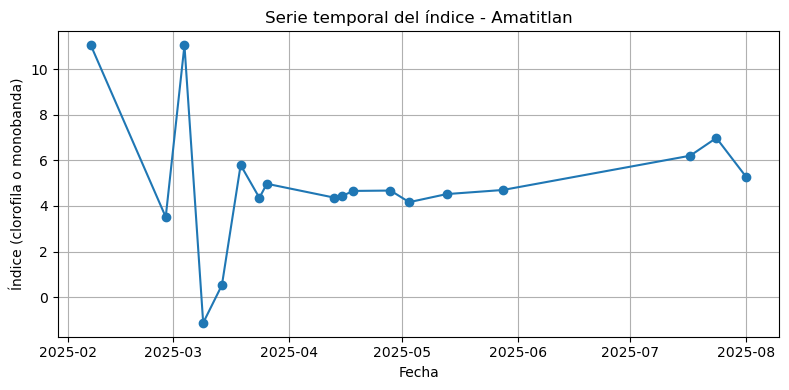

Error en Atitlan/2025-04-03.tiff: Read failed. See previous exception for details.
Atitlan: timeseries_Atitlan.csv -> 28 filas


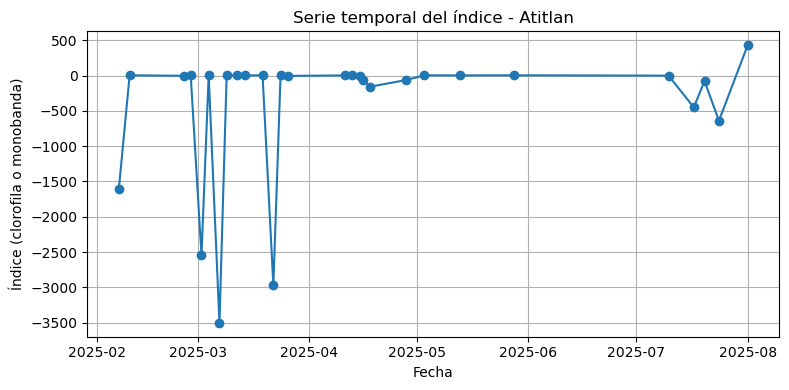

timeseries_all_lakes.csv


In [ ]:
all_rows = []

for lake, folder in LAKES.items():
    rows = []
    for fname in sorted(os.listdir(folder)):
        if not fname.lower().endswith((".tif", ".tiff")): 
            continue
        m = DATE_RE.search(fname)
        if not m: 
            continue
        date = pd.to_datetime(m.group(1))
        path = os.path.join(folder, fname)

        try:
            met = process_tif(path)
            rows.append({"date": date, "value": met["value"]})
        except Exception as e:
            print(f"Error en {folder}/{fname}: {e}")

    df = pd.DataFrame(rows).sort_values("date").set_index("date")
    out_csv = f"timeseries_{lake}.csv"
    df.to_csv(out_csv)
    print(f"{lake}: {out_csv} -> {len(df)} filas")

    if not df.empty:
        plt.figure(figsize=(8,4))
        plt.plot(df.index, df["value"], marker="o")
        plt.title(f"Serie temporal del índice - {lake}")
        plt.xlabel("Fecha")
        plt.ylabel("Índice (clorofila o monobanda)")
        plt.grid(True)
        plt.tight_layout()
        plt.show() 

    for d, v in df["value"].items():
        all_rows.append({"lake": lake, "date": d, "value": v})

if all_rows:
    all_df = pd.DataFrame(all_rows).sort_values(["lake","date"])
    all_df.to_csv("timeseries_all_lakes.csv", index=False)
    print("timeseries_all_lakes.csv")
